# Exploratory Analysis


In [1]:
import os
import math
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
data_path = Path("eda_house_prices.ipynb").parent.parent.resolve().parent
data_path

WindowsPath('C:/Users/viniciushc/Git_Vinicius/House_Prices')

In [3]:
data_files = Path(data_path, "data").resolve()
[os.path.basename(file) for file in data_files.glob('*.csv')]

['sample_submission.csv', 'test.csv', 'train.csv']

In [4]:
os.path.abspath("train.csv")

'c:\\Users\\viniciushc\\Git_Vinicius\\House_Prices\\notebook\\train.csv'

# Loading data

In [5]:
df_train = pd.read_csv(os.path.join(data_path, "data", "train.csv"))
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [6]:
df_train.shape

(1460, 81)

In [7]:
df_test = pd.read_csv(os.path.join(data_path, 'data', 'test.csv'))
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [8]:
df_test.shape

(1459, 80)

## Concatenating the Datasets

In [9]:
df_concat = pd.concat([df_train, df_test], ignore_index=True)
df_concat.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,

In [10]:
df_concat.shape

(2919, 81)

In [11]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Renaming Columns

In [12]:
df_concat.columns = map(str.lower, df_concat.columns)

In [13]:
df_concat.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [14]:
drop_cols = ['id']
df_concat.drop(drop_cols, axis = 1, inplace = True)

In [15]:
columns_null_values = df_concat.columns[df_concat.isnull().any()]

In [16]:
df_concat[columns_null_values].isnull().sum()

mszoning           4
lotfrontage      486
alley           2721
utilities          2
exterior1st        1
exterior2nd        1
masvnrtype        24
masvnrarea        23
bsmtqual          81
bsmtcond          82
bsmtexposure      82
bsmtfintype1      79
bsmtfinsf1         1
bsmtfintype2      80
bsmtfinsf2         1
bsmtunfsf          1
totalbsmtsf        1
electrical         1
bsmtfullbath       2
bsmthalfbath       2
kitchenqual        1
functional         2
fireplacequ     1420
garagetype       157
garageyrblt      159
garagefinish     159
garagecars         1
garagearea         1
garagequal       159
garagecond       159
poolqc          2909
fence           2348
miscfeature     2814
saletype           1
saleprice       1459
dtype: int64

In [17]:
# square feet
lotarea = df_concat['lotarea']

for square_feet in (lotarea.max(), lotarea.min(), lotarea.mean(), lotarea.median()):
    print(f"Max value for Lot Area = {square_feet:.2f}", end=f"{' > '*5:5}")
    print(f"Square Feets = {square_feet / 10.764:.2f}m²")

Max value for Lot Area = 215245.00 >  >  >  >  > Square Feets = 19996.75m²
Max value for Lot Area = 1300.00 >  >  >  >  > Square Feets = 120.77m²
Max value for Lot Area = 10168.11 >  >  >  >  > Square Feets = 944.64m²
Max value for Lot Area = 9453.00 >  >  >  >  > Square Feets = 878.21m²


In [18]:
df_mszoning = df_concat.groupby('mszoning')
df_mszoning_desc = df_mszoning['saleprice'].describe()
df_mszoning_desc.round(2)

,count,mean,std,min,25%,50%,75%,max
mszoning,,,,,,,,
C (all),10.0,74528.00,33791.09,34900.0,43998.25,74700.0,98332.0,133900.0
FV,65.0,214014.06,52369.66,144152.0,174000.00,205950.0,250000.0,370878.0
RH,16.0,131558.38,35714.12,76000.0,106150.00,136500.0,148608.5,200000.0
RL,1151.0,191004.99,80766.34,39300.0,137700.00,174000.0,224700.0,755000.0
RM,218.0,126316.83,48521.69,37900.0,100000.00,120500.0,140000.0,475000.0


In [19]:
df_concat[['lotarea', 'saleprice']].aggregate(['min', 'mean', 'max']).round(2)

,lotarea,saleprice
min,1300.00,34900.0
mean,10168.11,180921.2
max,215245.00,755000.0


<AxesSubplot:>

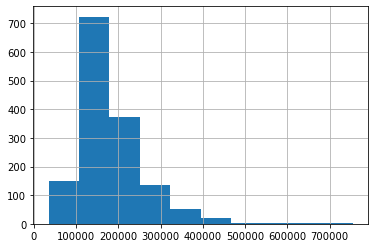

In [20]:
df_concat['saleprice'].hist()

In [21]:
df_concat[['lotarea', 'overallqual']].aggregate(['min', 'mean', 'max']).round(2)

,lotarea,overallqual
min,1300.00,1.00
mean,10168.11,6.09
max,215245.00,10.00


In [22]:
df_overal_quality_desc = df_concat.groupby('overallqual')
df_overal_quality_desc = df_overal_quality_desc['saleprice'].describe()
df_overal_quality_desc.round(2)

,count,mean,std,min,25%,50%,75%,max
overallqual,,,,,,,,
1,2.0,50150.00,15344.22,39300.0,44725.0,50150.0,55575.0,61000.0
2,3.0,51770.33,14254.20,35311.0,47655.5,60000.0,60000.0,60000.0
3,20.0,87473.75,24688.57,37900.0,75500.0,86250.0,97500.0,139600.0
4,116.0,108420.66,29022.00,34900.0,88000.0,108000.0,125500.0,256000.0
5,397.0,133523.35,27107.33,55993.0,118000.0,133000.0,147000.0,228950.0
6,374.0,161603.03,36090.18,76000.0,139125.0,160000.0,181000.0,277000.0
7,319.0,207716.42,44466.26,82500.0,179470.0,200141.0,230750.0,383970.0
8,168.0,274735.54,63898.90,122000.0,234557.5,269750.0,306250.0,538000.0
9,43.0,367513.02,81278.17,239000.0,318980.5,345000.0,389716.0,611657.0


<AxesSubplot:>

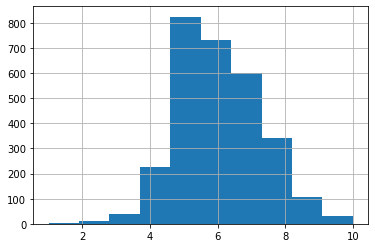

In [23]:
df_concat['overallqual'].hist()

In [24]:
df_concat[['overallqual', 'saleprice']].corr()

,overallqual,saleprice
overallqual,1.000000,0.790982
saleprice,0.790982,1.000000


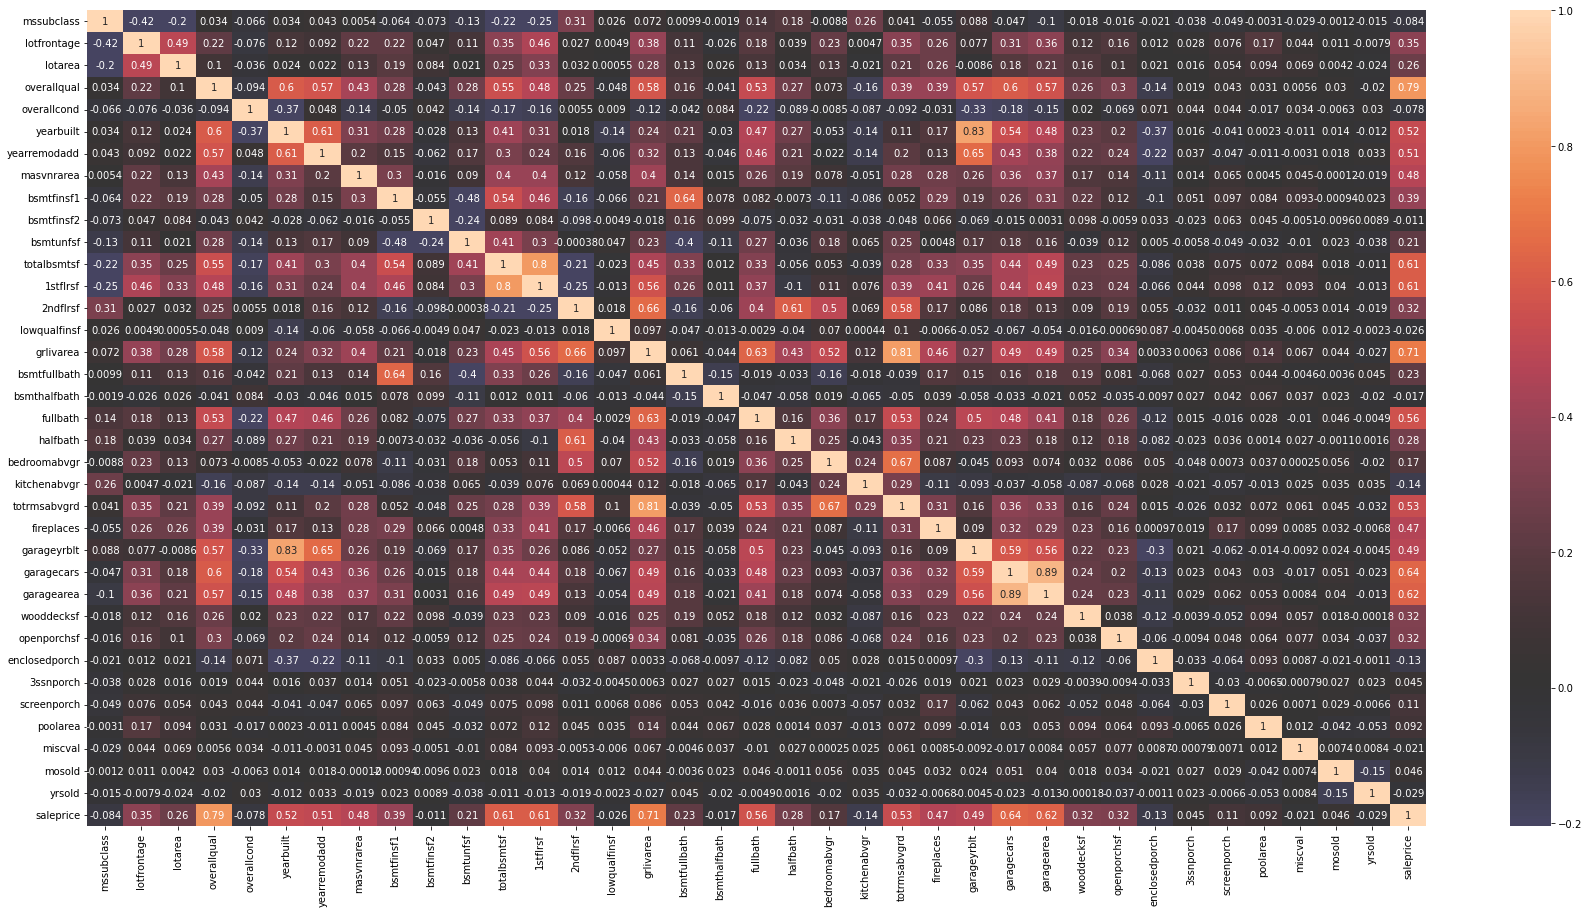

In [25]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_concat.corr(), annot=True, center = 0.01, robust = True, linecolor = 'black', alpha = 0.9)
plt.show()

c:\Users\viniciushc\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


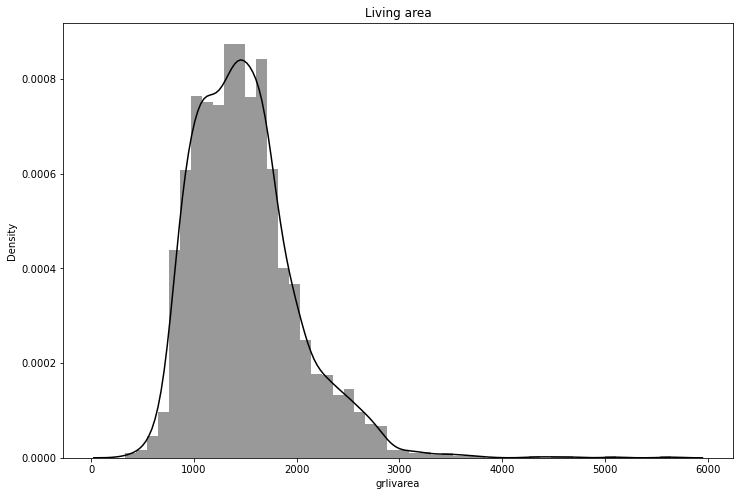

In [26]:
hist, ax = plt.subplots(figsize = (12, 8))

ax = sns.distplot(df_concat['grlivarea'], kde = True, color = 'black', norm_hist = True)
ax.set_title("Living area")
plt.show()

In [28]:
mu = df_concat['saleprice'].mean()
count_saleprice = df_concat['saleprice'].count()
somatoria = [((x - mu)**2) for x in df_concat['saleprice'] if not np.isnan(x)]
sigma = math.sqrt(sum(somatoria) / count_saleprice)
print(f"mu = {mu:.2f} ::: sigma = {sigma:.2f}")

mu = 180921.20 ::: sigma = 79415.29


# Slope Coefficient

## Finding the Beta value
### $\color{blue}\beta$=$\frac{\frac{\sum x.y}{n} - \frac{\sum x.\sum y}{n}}{\frac{\sum x^2}{n} - \left (\frac{\sum x}{n} \right)^2}$

In [29]:
df_sale_grlivarea = df_concat[['grlivarea', 'saleprice']]
df_sale_grlivarea.columns = ['X', 'Y']

In [30]:
df_sale_grlivarea.sort_values(by=['Y'])

,X,Y
495,720,34900.0
916,480,35311.0
968,968,37900.0
533,334,39300.0
30,1317,40000.0
710,729,52000.0
1337,693,52500.0
705,1092,55000.0
1325,796,55000.0
812,1044,55993.0


In [31]:
df_sale_grlivarea['X²'] = df_sale_grlivarea['X'].apply(lambda x: x ** 2)

C:\Users\viniciushc\AppData\Local\Temp\ipykernel_25812\4149935822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale_grlivarea['X²'] = df_sale_grlivarea['X'].apply(lambda x: x ** 2)


In [33]:
df_sale_grlivarea_notnull = df_sale_grlivarea[df_sale_grlivarea.Y.isnull() == False]

In [34]:
x = df_sale_grlivarea_notnull.X.to_list()
y = df_sale_grlivarea_notnull.Y.to_list()

In [36]:
sum_x_y = np.mean(np.array(x).sum() * np.array(y).sum())
sum_x_y

584441032185842.0

In [37]:
np.mean(np.array(x) * np.array(y))

303741109.8753425

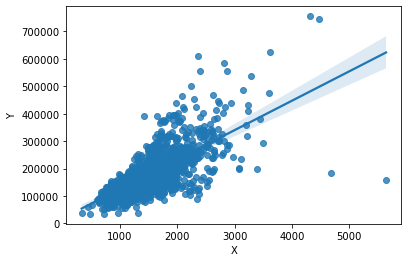

In [38]:
sns.regplot(x="X", y="Y", data=df_sale_grlivarea_notnull);

In [39]:
b, a = np.polyfit(x, y, deg=1)
b, a

(107.13035896582518, 18569.025856487286)

In [41]:
mean_xy = np.mean(np.array(x) * np.array(y))
mean_x = np.mean(np.array(x))
mean_y = np.mean(np.array(y))
mean_x2 = np.mean(np.array(x) ** 2)
mean2_x = np.mean(np.array(x)) ** 2
m = (mean_xy - mean_x * mean_y) / (mean_x2 - mean2_x)
m

107.13035896582547

In [42]:
def beta_value(x: list, y: list) -> float:
    """Function to calculate the beta value from two variables"""

    assert len(x) == len(y), "Expected the same length for x and y."

    array_x = np.array(x)
    array_y = np.array(y)

    mean_xy = np.mean(array_x * array_y)
    meanx_meany = array_x.mean() * array_y.mean()
    mean_x2 = np.mean(array_x ** 2)
    mean2_x = np.mean(array_x) ** 2

    beta = (mean_xy - meanx_meany) / (mean_x2 - mean2_x)

    return beta


beta = beta_value(x, y)
print(f'The Beta given x and y is equal to: {beta}')

The Beta given x and y is equal to: 107.13035896582547


## Intercept

### 1. $A\;$=$\;\bar{y} - \beta . \bar{x}$
### OR 
### 2. $A\;$=$\;\frac{\sum y - \beta.\sum{x}}{n}$

In [44]:
y_bar = np.mean(y)
x_bar = np.mean(x)
A_i = y_bar - beta * x_bar
A_i

18569.025856486813

### Real X = 1710
### Real Y = 208500.0

720	

 34900.0
244659.23849107124

In [45]:
y_predict = A_i + beta * 1710
y_predict

201761.93968804835

In [46]:
y_pred = [A_i + beta * xi for xi in x]

In [47]:
y_pred

[201761.93968804835,
 153767.53887135856,
 209903.8469694511,
 202511.85220080914,
 254041.5548633712,
 164480.57476794109,
 200047.85394459515,
 242471.47609506204,
 208618.2826618612,
 133948.42246268084,
 129984.5991809453,
 267539.9800930652,
 116271.91323331963,
 178621.78215143006,
 152803.36564066613,
 110058.35241330176,
 126127.90625817559,
 157409.9710761966,
 137912.24574441637,
 162016.57651172712,
 273110.7587592881,
 137269.46359062142,
 210868.0202001435,
 132127.2063602618,
 132127.2063602618,
 189977.60020180757,
 114986.34892572973,
 201119.1575342534,
 189977.60020180757,
 74276.81251871606,
 159659.70861447896,
 150125.10666652047,
 150767.88882031545,
 200690.6360983901,
 185799.51620214037,
 281252.66604069085,
 136091.02964199736,
 157517.10143516245,
 131805.81528336433,
 141983.19938511774,
 160409.62112723972,
 160838.14256310303,
 113272.26318227653,
 119057.3025664311,
 141768.9386671861,
 206261.41476461303,
 248792.16727404573,
 195976.90030389378,
 174122

In [48]:
df_sale_grlivarea_notnull['x.y'] = df_sale_grlivarea_notnull.X * df_sale_grlivarea_notnull.Y

C:\Users\viniciushc\AppData\Local\Temp\ipykernel_25812\3585740771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale_grlivarea_notnull['x.y'] = df_sale_grlivarea_notnull.X * df_sale_grlivarea_notnull.Y


In [50]:
df_sale_grlivarea_notnull.head()

,X,Y,X²,x.y
0,1710,208500.0,2924100,356535000.0
1,1262,181500.0,1592644,229053000.0
2,1786,223500.0,3189796,399171000.0
3,1717,140000.0,2948089,240380000.0
4,2198,250000.0,4831204,549500000.0


In [127]:
mean_xy = np.mean(df_sale_grlivarea_notnull['x.y'])
mean_x = np.mean(df_sale_grlivarea_notnull['X'])
mean_y = np.mean(df_sale_grlivarea_notnull['Y'])
mean_x2 = np.mean(df_sale_grlivarea_notnull['X²'])
mean2_x = np.mean(df_sale_grlivarea_notnull['X']) ** 2
m = (mean_xy - mean_x * mean_y) / (mean_x2 - mean2_x)
m

107.13035896582547

In [93]:
b = (mean_x2 * mean_y - mean_x * mean_xy) / (mean_x2 - mean2_x)
b

18569.025856486955

In [95]:
y_predict = b + m * 1710
y_predict

201761.9396880485

In [64]:
y_predict = 18569.02585649 + 107.13035897 * 1256
y_predict

153124.75672280998

In [51]:
y_hat = [A_i + (beta * xi) for xi in x]
y_hat

[201761.93968804835,
 153767.53887135856,
 209903.8469694511,
 202511.85220080914,
 254041.5548633712,
 164480.57476794109,
 200047.85394459515,
 242471.47609506204,
 208618.2826618612,
 133948.42246268084,
 129984.5991809453,
 267539.9800930652,
 116271.91323331963,
 178621.78215143006,
 152803.36564066613,
 110058.35241330176,
 126127.90625817559,
 157409.9710761966,
 137912.24574441637,
 162016.57651172712,
 273110.7587592881,
 137269.46359062142,
 210868.0202001435,
 132127.2063602618,
 132127.2063602618,
 189977.60020180757,
 114986.34892572973,
 201119.1575342534,
 189977.60020180757,
 74276.81251871606,
 159659.70861447896,
 150125.10666652047,
 150767.88882031545,
 200690.6360983901,
 185799.51620214037,
 281252.66604069085,
 136091.02964199736,
 157517.10143516245,
 131805.81528336433,
 141983.19938511774,
 160409.62112723972,
 160838.14256310303,
 113272.26318227653,
 119057.3025664311,
 141768.9386671861,
 206261.41476461303,
 248792.16727404573,
 195976.90030389378,
 174122

In [52]:
df_sale_grlivarea_notnull['y_hat'] = y_hat
df_sale_grlivarea_notnull.head()

C:\Users\viniciushc\AppData\Local\Temp\ipykernel_25812\1616414882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale_grlivarea_notnull['y_hat'] = y_hat


,X,Y,X²,x.y,y_hat
0,1710,208500.0,2924100,356535000.0,201761.939688
1,1262,181500.0,1592644,229053000.0,153767.538871
2,1786,223500.0,3189796,399171000.0,209903.846969
3,1717,140000.0,2948089,240380000.0,202511.852201
4,2198,250000.0,4831204,549500000.0,254041.554863


In [68]:
df_sale_grlivarea_notnull.shape[0]

1460

In [77]:
((np.sum(df_sale_grlivarea_notnull.X) - np.mean(df_sale_grlivarea_notnull.X)) ** 2) / df_sale_grlivarea_notnull.shape[0]

3348488436.51464

In [72]:
np.sum(np.sum(df_sale_grlivarea_notnull.X) - np.mean(df_sale_grlivarea_notnull.X) ** 2) / df_sale_grlivarea_notnull.shape[0]

-57.57069990803768

In [65]:
df_sale_grlivarea_notnull.apply(lambda x: np.sum(x["X"] - np.mean(x["X"])), axis=1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      0.0
34      0.0
35      0.0
36      0.0
37      0.0
38      0.0
39      0.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      0.0
54      0.0
55      0.0
56      0.0
57      0.0
58      0.0
59      0.0
60      0.0
61      0.0
62      0.0
63      0.0
64      0.0
65      0.0
66      0.0
67      0.0
68      0.0
69      0.0
70      0.0
71      0.0
72      0.0
73      0.0
74      0.0
75      0.0
76      0.0
77      0.0
78      0.0
79      0.0
80      0.0
81      0.0
82      0.0
83  

In [72]:
yi = df_sale_grlivarea_notnull.Y[0]
yii = df_sale_grlivarea_notnull.Y[1]

xi = df_sale_grlivarea_notnull.X[0]
xii = df_sale_grlivarea_notnull.X[1]
(yii - yi) / (xii - xi)

60.267857142857146

C:\Users\viniciushc\AppData\Local\Temp\ipykernel_18468\2327675459.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, y_pred, 'k--', color='red')


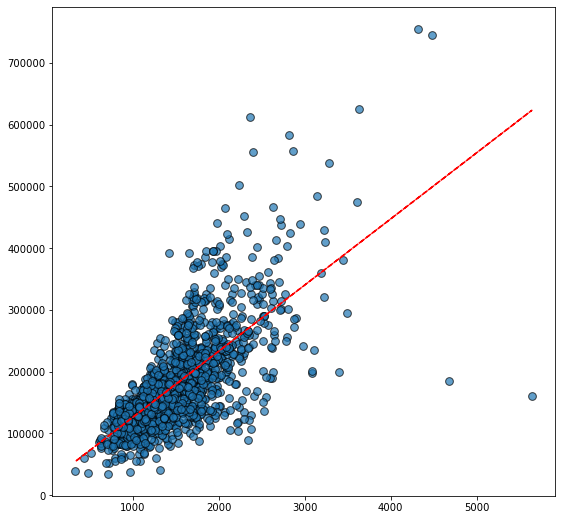

In [177]:
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

ax.plot(x, y_pred, 'k--', color='red')

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [53]:
y_array = np.array(y).reshape(-1, 1)
x_array = np.array(x).reshape(-1, 1)

In [54]:
# Train the model using the training sets
regr.fit(x_array, y_array)

LinearRegression()

In [59]:
regr.coef_

array([[107.13035897]])

Coefficients: 
 [[107.13035897]]
Mean squared error: 440438209648257.56
Coefficient of determination: -69834.58


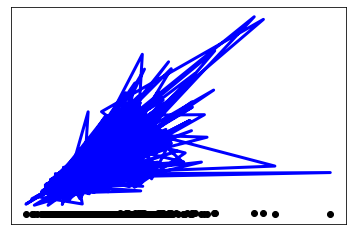

In [176]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(np.array(y).reshape(-1, 1))

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(np.array(y).reshape(-1, 1), diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(np.array(y).reshape(-1, 1), diabetes_y_pred))

# Plot outputs
plt.scatter(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1), color="black")
plt.plot(np.array(x).reshape(-1, 1), diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
len(np.array(y).reshape(-1, 1))

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

mae_sum = 0
for sale, x in zip(np.array(y).reshape(-1, 1), np.array(x).reshape(-1, 1)):
    prediction = lm.predict(np.array(x).reshape(-1, 1))
    mae_sum += abs(np.array(y).reshape(-1, 1) - np.array(df_sale_grlivarea_notnull['y_hat']).reshape(-1, 1))
mae = mae_sum / len(np.array(y).reshape(-1, 1))

print(mae)

In [ ]:
np.array(df_sale_grlivarea_notnull['y_hat']).reshape(-1, 1)

In [ ]:
np.array(x).reshape(-1, 1)

$x_{1,2}$=$\frac{-b\pm\sqrt{\color{Red}b^2-4ac}}{2a}$

In [ ]:
number_minus_mean = [number - mu for number in df_concat['saleprice'][:10]]
number_minus_mean

In [ ]:
number_powers_two = [number ** 2 for number in number_minus_mean]
number_powers_two

In [ ]:
TSS = sum(number_powers_two)
TSS

# $y_{i}$ = $\alpha$ + $\beta x_{i}$ + $\varepsilon_{i}$

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [ ]:
y = df_concat['saleprice'][:10]
x = df_concat['grlivarea'][:10]

In [ ]:
slope, intercept, r, p, se = stats.linregress(x, y)

In [ ]:
print(" SLOPE = ", slope, "\n", "INTERCEPT = ", intercept, "\n", "R = ", r, "\n", "P = ", p, "\n", "SE = ", se)

c:\Users\viniciushc\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


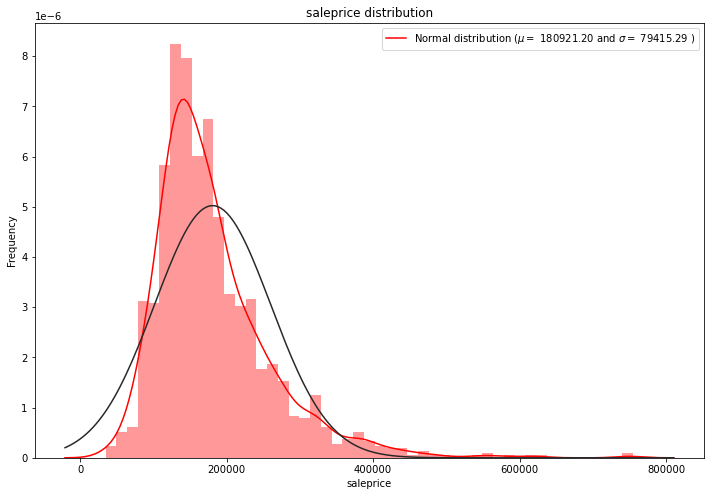

In [175]:
hist, ax = plt.subplots(figsize = (12, 8))

ax = sns.distplot(df_concat['saleprice'], kde = True, color = 'red', norm_hist = True, fit=norm)
ax.set_title("saleprice")
plt.legend([f'Normal distribution ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'])
plt.ylabel('Frequency')
plt.title('saleprice distribution')

plt.show()

In [ ]:
outlier = (df_concat['grlivarea'] > 4000) & (df_concat['saleprice'] < 300000)
outlier

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df_concat,
                x = 'grlivarea',
                y = 'saleprice',
                hue = outlier,
                alpha = 0.9,
                )

## DROP OUTLIERS

In [ ]:
drop_outliers = df_concat[outlier == True].index
df_concat.drop(drop_outliers, inplace=True)

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df_concat,
                x = 'grlivarea',
                y = 'saleprice',
                alpha = 0.9,
                )

In [ ]:
sns.jointplot('grlivarea', 'saleprice', data=df_concat, kind = 'kde')

In [ ]:
sns.lmplot(x ='grlivarea', y ='saleprice', data = df_concat,scatter_kws={'alpha':0.5},line_kws={'color':'red'} )

In [ ]:
df_concat['saleprice'][0]

In [ ]:
np.log10(df_concat['saleprice'][0])

In [ ]:
np.log1p(df_concat['saleprice'][0])

In [ ]:
np.log2(df_concat['saleprice'][0])

In [ ]:
x = df_concat['saleprice'][:10]
y = df_concat['grlivarea'][:10]

In [ ]:
slope_intercept = np.polyfit(x, y, 1)

print(slope_intercept)